# L7~8 

## 第一题 
**原题复现**：
- 利用二次规划函数，分别编程实现原问题求解的支撑向量机算法（Primal-SVM）、对偶的支撑向量机算法（Dual-SVM）、和核函数的支撑向量机算法（Kernel-SVM）。

**导入相关库**：
- 为了实现相关算法，我们首先要导入python中的相关库，这里我们导入python中的numpy库，用于数值计算；导入cvxopt库，用于求解二次规划问题。导入matplotlib库，用于画图。导入sklearn中的train_test_split，用于划分训练集和测试集。导入sklearn中的accuracy_score，用于计算分类准确率。

In [117]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from cvxopt import matrix, solvers
import time
import random

**Primal-SVM实现**：
- 首先，定义一个全零矩阵p，形状为(3, 3)。再和一个全零向量q，形状为(3, 1)。两者数据类型均为float64。p矩阵和q向量将用于定义二次规划问题的目标函数。
- 定义一个全零矩阵g，形状为(样本数, 3)，数据类型为float64。该矩阵将用于定义问题的约束条件。
- 创建一个名为vector的一维数组，形状为(3,)，数据类型为float64，这个一维数组用于存储SVM模型的权重向量。
-将p矩阵(1,1)和(2,2)位置的元素为设为1.0，原因是原始SVM问题的目标函数通常是二次规划问题，这些对角元素用来表示正则化项的权重。
- 进入循环，遍历数据集X中的每个样本：
  - 对于每个样本，计算g矩阵的对应行并将其分配为相应的约束条件。这些约束条件可以确保每个数据点都满足SVM的分类约束条件。
- 创建一个名为h的向量，形状为(num_samples, 1)，数据类型为float64。h向量存储了每个约束条件的右侧值，被设置为-1.0以确保样本在正确的一侧。
- 利用cvxopt库中的solvers.qp函数来解决二次规划问题。向solvers.qp函数代入目标函数中的p矩阵、q向量以及约束条件中的g矩阵和h向量。
- 输出solvers.qp得到结果中的权重向量result['x']，这些权重向量即为SVM模型的权重向量。
- 将result['x']中的值分别赋给vector数组的元素，得到SVM模型的权重向量。
- 最后，返回SVM模型的权重向量vector。

In [118]:
def Primal_SVM(X):
    p = np.zeros((3,3),dtype='float64')
    q = np.zeros((3, 1), dtype='float64')
    g = np.zeros((len(X), 3), dtype='float64')
    vector = np.array([0, 0, 0], dtype='float64')
    p[1][1] = 1.0
    p[2][2] = 1.0
    for i in range(0, len(X)):
        g[i][0] = -X[i][-1] * X[i][0] * 1.0
        g[i][1] = -X[i][-1] * X[i][1] * 1.0
        g[i][2] = -X[i][-1] * X[i][2] * 1.0
    h = np.full((len(X), 1), -1, dtype='float64')
    result = solvers.qp(matrix(p), matrix(q), matrix(g), matrix(h))
    print(result['x'])
    vector[0] = result['x'][0]
    vector[1] = result['x'][1]
    vector[2] = result['x'][2]
    return vector


**Dual-SVM实现**：
- 创建一个名为sv_dual的空列表，用于存储对偶SVM模型的支持向量的索引。
- 初始化一个名为vector的一维数组，形状为(3,)，数据类型为float64，用于存储SVM模型的权重向量。
- 创建一个名为p的二维数组，形状为(num_samples, num_samples)，数据类型为float64。这个矩阵将用于定义二次规划问题的目标函数。
- 创建一个名为q的一维数组，形状为(num_samples, 1)，数据类型为float64，并将其填充为-1，用于定义问题的目标函数。
- 创建一个名为g的二维数组，形状为(num_samples, num_samples)，数据类型为float64。这个矩阵将用于定义问题的约束条件。
- 创建一个名为h的一维数组，形状为(num_samples, 1)，数据类型为float64，并将其初始化为全零，用于定义问题的约束条件。
- 创建一个名为a的一维数组，形状为(num_samples,)，数据类型为float64，用于存储样本的标签。
- 创建一个名为b的矩阵，形状为(1,1)，数据类型为float64，用于存储问题的右侧值。
- 进入两层循环，遍历数据集X中的每对样本（i和j）：
  - 计算p矩阵的对应元素，将其设置为样本i和样本j之间的内积，乘以相应的标签，乘以1.0。
- 进入一个循循环，遍历数据集X中的每个样本（i）：
  - 设置g矩阵的对角元素为-1.0，以确保约束条件。
- 再次进入一个循环，遍历数据集X中的每个样本（i）
  - 将样本i的标签赋给a数组的相应位置。
- 初始化一个名为result的字典，通过调用cvxopt库中的solvers.qp函数来解决二次规划问题。solvers.qp函数接受目标函数中的p矩阵、q向量以及约束条件中的g矩阵和h向量，以及等式约束条件中的a数组和b矩阵。
- 遍历数据集X中的每个样本（i）：
  - 如果result中对应x的元素绝对值大于等于1e-4，表示这个样本是支持向量。
  - 将支持向量对应的特征（除了标签外的部分）与其权重相乘并加到vector[1:]中。
  - 打印出对偶SVM的支持向量以及它们的特征。
  - 将支持向量对应的标签与vector[0]相乘并减去与特征的内积，得到截距项。
- 最后，返回SVM模型的权重向量vector，其中vector[0]表示截距项，而vector[1:]表示特征权重。支持向量在这个过程中被识别并存储在sv_dual列表中，以供后续分析和可视化。

In [119]:
sv_dual = []
def Dual_SVM(X):
    vector = np.array([0, 0, 0], dtype='float64')
    p = np.zeros((len(X), len(X)), dtype='float64')
    q = np.full((len(X), 1), -1, dtype='float64')
    g = np.zeros((len(X), len(X)), dtype='float64')
    h = np.zeros((len(X), 1), dtype='float64')
    a = np.zeros(len(X), dtype='float64')
    b = matrix([0.0])
    for i in range(0, len(X)):
        for j in range(i, len(X)):
            p[i][j] = p[j][i] = X[i][-1] * X[j][-1] * np.dot(X[i][:-1], X[j][:-1]) * 1.0
    for i in range(0, len(X)):
        g[i][i] = -1.0
    for i in range(0, len(X)):
        a[i] = X[i][-1] * 1.0
    result = solvers.qp(matrix(p), matrix(q), matrix(g), matrix(h), matrix(a, (1, len(X))), b)
    for i in range(0, len(X)):
        if abs(result['x'][i]) >= 1e-4:
            vector[1:] += float(result['x'][i]) * float(X[i][-1]) * np.array(X[i][1:-1], dtype='float64')
            print('Dual_SVM supporting vector: ', X[i][1:-1])
            sv_dual.append(i)
    for i in range(0, len(X)):
        if abs(result['x'][i]) >= 1e-4:
            vector[0] = X[i][-1] - np.dot(X[i][1:-1], vector[1:])
            break
    return vector

**count_errors函数**：
- 用于计算分类错误的样本数。
  - X: 包含样本数据的数组，每行表示一个样本，最后一列是样本的标签。
  - flag: 一个整数，表示使用的SVM类型和核函数。
  - alphas: 用于支持向量的拉格朗日乘子
  该函数执行下面操作:
  - 初始化count为0，表示初始分类错误的样本数。
  - 根据flag的值，执行不同类型的SVM分类错误计算：
    - 如果 flag 为1或2，表示使用线性SVM：
      - 对数据集 X 中的每个样本进行遍历。
      - 如果样本的标签与权重向量 w 与特征的内积小于等于0，则将 count 增加1。
    - 如果 flag 为3，表示使用四次多项式核的SVM：
      - 对数据集 X 中的每个样本进行遍历。
      - 计算 temp 和 b，其中 temp 是四次多项式核函数的值，b 是样本的标签。
      - 对数据集 X 中的每个支持向量（使用非零的 alphas），计算 temp 和 b 的更新值
      - 如果样本的标签与 temp 和 b 的组合值小于等于0，则将 count 增加1。
    - 如果 flag 为4，表示使用高斯核的SVM：
      - 对数据集 X 中的每个样本进行遍历。
      - 计算 temp 和 b，其中 temp 是高斯核函数的值，b 是样本的标签。
      - 对数据集 X 中的每个支持向量（使用非零的 alphas），计算 temp 和 b 的更新值。
      - 如果样本的标签与 temp 和 b 的组合值小于等于0，则将 count 增加1。
  - 返回 count，表示分类错误的样本数量。

In [120]:
def count_errors(X, w, flag, alphas):
    count = 0
    if flag == 1 or flag == 2:
        for i in range(0, len(X)):
            if np.dot(w, X[i][:-1]) * X[i][-1] <= 0:
                count += 1
    if flag == 3:
        for i in range(0, len(X)):
            temp, b = 0, X[i][-1]
            for j in range(0, len(X)):
                if abs(alphas[j]) >= 1e-4:
                    temp += alphas[j] * X[j][-1] * (np.dot(X[j][1:-1], X[i][1:-1]) + 1) ** 4
            for k in range(0, len(X)):
                if abs(alphas[k]) >= 1e-4:
                    for m in range(0, len(X)):
                        b -= alphas[m] * X[m][-1] * (np.dot(X[m][1:-1], X[k][1:-1]) + 1) ** 4
                        break
                break
            if X[i][-1] * (temp + b) <= 0:
                count += 1
    elif flag == 4:
        for i in range(0, len(X)):
            temp, b = 0, X[i][-1]
            for j in range(0, len(X)):
                if abs(alphas[j]) >= 1e-4:
                    temp += alphas[j] * X[j][-1] * np.exp(
                        -(np.linalg.norm(X[j][1:-1] - X[i][1:-1])) ** 2)
            for k in range(0, len(X)):
                if abs(alphas[k]) >= 1e-4:
                    for m in range(0, len(X)):
                        b -= alphas[m] * X[m][-1] * np.exp(
                            -(np.linalg.norm(X[m][:-1] - X[k][:-1])) ** 2)
                        break
                break
            if X[i][-1] * (temp + b) <= 0:
                count += 1
    else:
        print('invalid input')
    return count


**Kernel-SVM实现**：
- Kernel_SVM函数接收的参数如下:
    - X: 包含样本数据的数组，每行表示一个样本，最后一列是样本的标签。
    - X_train: 包含训练集的样本数据的数组。
    - X_test: 包含测试集的样本数据的数组。
    - kernel_function: 表示使用的核函数类型，可以是'quadratic'（四次多项式核）或'gaussian'（高斯核）。
- 该函数执行的操作如下：
  - 根据 kernel_function 的值，选择核函数类型。这里支持两种类型的核函数：四次多项式核和高斯核。
  - 对于四次多项式核（kernel_function 为'quadratic'）
    - 创建 p 矩阵，q 向量，g 矩阵，h 向量，a 数组和 b 矩阵，这些将用于定义SVM的二次规划问题。
    - 遍历数据集 X 中的每对样本，计算并填充 p 矩阵。
    - 设置 g 矩阵的对角元素为-1，以确保约束条件。
    - 将样本标签赋给 a 数组的相应位置。
    - 使用 solvers.qp 函数解决二次规划问题，并获取结果。
    - 输出四次多项式核SVM的支持向量。
    - 计算训练集和测试集上的精度。
  - 对于高斯核（kernel_function 为'gaussian'）：
    - 创建 p 矩阵，q 向量，g 矩阵，h 向量，a 数组和 b 矩阵，这些将用于定义SVM的二次规划问题。
    - 遍历数据集 X 中的每对样本，计算并填充 p 矩阵。
    - 设置 g 矩阵的对角元素为-1，以确保约束条件。
    - 将样本标签赋给a数组。
    - 使用 solvers.qp 函数解决二次规划问题，并获取结果。
    - 输出高斯核SVM的支持向量。
    - 计算训练集和测试集上的精度。
  - 如果 kernel_function 不是'quadratic'或'gaussian'中的任意一个，则函数返回。

In [121]:
def Kernel_SVM(X,X_train,X_test,kernel_function):
    if kernel_function == 'quadratic':
        p = np.zeros((len(X), len(X)), dtype='float64')
        q = np.full((len(X), 1), -1, dtype='float64')
        g = np.zeros((len(X), len(X)), dtype='float64')
        h = np.zeros((len(X), 1), dtype='float64')
        a = np.zeros(len(X), dtype='float64')
        b = matrix([0.0])
        for i in range(0, len(X)):
            for j in range(i, len(X)):
                p[i][j] = p[j][i] = X[i][-1] * X[j][-1] * (
                        np.dot(X[i][:-1], X[j][:-1]) + 1) ** 4 * 1.0
        for i in range(0, len(X)):
            g[i][i] = -1.0
        for i in range(0, len(X)):
            a[i] = X[i][-1] * 1.0
        result = solvers.qp(matrix(p), matrix(q), matrix(g), matrix(h), matrix(a, (1, len(X))), b)
        for i in range(0, len(X)):
            if abs(result['x'][i]) >= 1e-4:
                print('Quadratic kernel supporting vector: ', X[i][1:-1])
        quadratic_accuracy_on_trainset = 1 - count_errors(X=X_train, w=None, flag=3, alphas=result['x']) / 320
        quadratic_accuracy_on_testset = 1 - count_errors(X=X_test, w=None, flag=3, alphas=result['x']) / 80
        print('accuracy on X_train(quadratic kernel): ', quadratic_accuracy_on_trainset)
        print('accuracy on X_train(quadratic kernel): ', quadratic_accuracy_on_testset)
    elif kernel_function == 'gaussian':
        p = np.zeros((len(X), len(X)), dtype='float64')
        q = np.full((len(X), 1), -1, dtype='float64')
        g = np.zeros((len(X), len(X)), dtype='float64')
        h = np.zeros((len(X), 1), dtype='float64')
        a = np.zeros(len(X), dtype='float64')
        b = matrix([0.0])
        for i in range(0, len(X)):
            for j in range(i, len(X)):
                p[i][j] = p[j][i] = X[i][-1] * X[j][-1] * (
                        np.dot(X[i][:-1], X[j][:-1]) + 1) ** 4 * 1.0
        for i in range(0, len(X)):
            g[i][i] = -1.0
        for i in range(0, len(X)):
            a[i] = X[i][-1] * 1.0
        result = solvers.qp(matrix(p), matrix(q), matrix(g), matrix(h), matrix(a, (1, len(X))), b)
        for i in range(0, len(X)):
            if abs(result['x'][i]) >= 1e-4:
                print('Gaussian kernel supporting vector: ', X[i][1:-1])
        gaussian_accuracy_on_trainset = 1 - count_errors(X=X_train, w=None, flag=4, alphas=result['x']) / 320
        gaussian_accuracy_on_testset = 1 - count_errors(X=X_test, w=None, flag=4, alphas=result['x']) / 80
        print('accuracy on X_train(gaussian kernel): ', gaussian_accuracy_on_trainset)
        print('accuracy on X_train(gaussian kernel): ', gaussian_accuracy_on_testset)
    else:
        return

## 第二题
**原题复现**：
- （a）产生两个都具有200个二维向量的数据集X_1和X_2。数据集X_1的样本来自均值向量〖m_1=[-5,0]〗^T 、协方差矩阵s_1=I的正态分布，属于“+1”类，数据集X_2的样本来自均值向量〖m_2=[0,5]〗^T、协方差矩阵s_2=I的正态分布，属于“-1”类，其中 是一个2*2的单位矩阵。产生的数据中80%用于训练，20%用于测试。
- （b）在上述数据集上分别运用Primal-SVM、Dual-SVM和Kernel-SVM算法，利用产生的训练样本集得到分类面，其中，Kernel-SVM中的核函数分别采用四次多项式和高斯核函数，算法中用到的各类超参数自定。
- （c）分别在训练集和测试集上统计分类正确率。
- （d）对于Dual-SVM和Kernel-SVM算法，指出哪些样本是支撑向量
- （e）画出数据集和分类面、间隔面，并标注出哪些样本是支撑向量，观察是否有边界上的向量不是支撑向量的现象。


**数据准备**
- 为了生成符合题目要求的数据集，且同时满足随机性,可按照如下方法生成并划分数据集。


In [122]:
#设置随机种子
np.random.seed(50)
#生成200个服从正态分布的随机数
samples = 200                  #样本数
interval_1 = np.array([-5,0])  #第一类样本的区间
interval_2 = np.array([0,5])   #第二类样本的区间
cov_matrix = np.array([[1,0],[0,1]]) #协方差矩阵

#生成第一类样本
X_1 = np.random.multivariate_normal(interval_1, cov_matrix, samples)
#生成第二类样本
X_2 = np.random.multivariate_normal(interval_2, cov_matrix, samples)

#将第一类样本的标签设为1
y_1 = np.ones(samples)
#将第二类样本的标签设为-1
y_2 = np.ones(samples) * -1
#将两类样本合并
X = np.vstack((X_1, X_2))
y = np.hstack((y_1, y_2))
X_1 = np.ones(X.shape[0])
X = np.insert(X, 0, values=X_1, axis=1)
dataset = np.column_stack((X, y))
print(dataset)

dataset_train ,dataset_test = train_test_split(dataset,test_size=0.2,random_state=30)


[[ 1.         -6.56035211 -0.0309776   1.        ]
 [ 1.         -5.62092842 -1.46458049  1.        ]
 [ 1.         -3.58805388 -0.47673214  1.        ]
 ...
 [ 1.         -0.94210244  3.83977959 -1.        ]
 [ 1.         -1.01157614  5.49898375 -1.        ]
 [ 1.         -1.28940376  5.33778742 -1.        ]]


In [123]:
def draw_classification(dataset, w):
    x1, y1, x2, y2, x3, y3, svs_x1, svs_y1, svs_x2, svs_y2 = [], [], [], [], [], [], [], [], [], []

    for i in range(0, len(dataset)):
        if dataset[i][-1] == 1:
            x1.append(dataset[i][1])
            y1.append(dataset[i][2])
            if i in sv_dual:
                svs_x1.append(dataset[i][1])
                svs_y1.append(dataset[i][2])
        elif dataset[i][-1] == -1:
            x2.append(dataset[i][1])
            y2.append(dataset[i][2])
            if i in sv_dual:
                svs_x2.append(dataset[i][1])
                svs_y2.append(dataset[i][2])
    x3 = np.linspace(-9, 9, 100)
    y3 = -(w[1] / w[2]) * x3 - w[0] / w[2]
    y4 = -(w[1] / w[2]) * x3 - w[0] / w[2] + 1 / w[2]
    y5 = -(w[1] / w[2]) * x3 - w[0] / w[2] - 1 / w[2]
    plt.scatter(x1, y1, marker='o', color='red', s=10)
    plt.scatter(x2, y2, marker='o', color='green', s=10)
    plt.scatter(svs_x1, svs_y1, marker='o', color='black', s=10)
    plt.scatter(svs_x2, svs_y2, marker='o', color='purple', s=10)
    plt.plot(x3, y3, color='orange')
    plt.plot(x3, y4, color='blue')
    plt.plot(x3, y5, color='blue')
    plt.legend(loc='best')
    plt.show()


     pcost       dcost       gap    pres   dres
 0:  3.4560e-02  6.3323e+01  1e+03  2e+00  2e+03
 1:  2.0901e-01 -2.1722e+02  4e+02  6e-01  7e+02
 2:  4.3996e-01 -1.9531e+02  2e+02  4e-01  4e+02
 3:  8.3910e-01 -1.2027e+02  1e+02  2e-01  2e+02
 4:  1.0323e+00 -2.4436e+00  3e+00  4e-03  4e+00
 5:  9.0896e-01  4.1691e-01  5e-01  3e-04  3e-01
 6:  8.3945e-01  8.2748e-01  1e-02  8e-06  8e-03
 7:  8.3865e-01  8.3853e-01  1e-04  8e-08  8e-05
 8:  8.3864e-01  8.3864e-01  1e-06  8e-10  8e-07
 9:  8.3864e-01  8.3864e-01  1e-08  8e-12  8e-09
Optimal solution found.
[ 7.36e-01]
[-7.68e-01]
[-1.04e+00]



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


     pcost       dcost       gap    pres   dres
 0: -2.3610e+01 -4.3893e+01  1e+03  3e+01  2e+00
 1: -2.2755e+01 -1.5127e+01  4e+02  1e+01  6e-01
 2: -3.8196e+01 -1.4480e+01  2e+02  6e+00  4e-01
 3: -3.2224e+01 -5.9398e+00  1e+02  2e+00  2e-01
 4: -2.2046e+00 -1.0456e+00  3e+00  7e-02  4e-03
 5: -7.5221e-01 -9.0948e-01  5e-01  5e-03  3e-04
 6: -8.3522e-01 -8.3947e-01  1e-02  1e-04  8e-06
 7: -8.3861e-01 -8.3865e-01  1e-04  1e-06  8e-08
 8: -8.3864e-01 -8.3864e-01  1e-06  1e-08  8e-10
 9: -8.3864e-01 -8.3864e-01  1e-08  1e-10  8e-12
Optimal solution found.
Dual_SVM supporting vector:  [-1.68592465  0.98777046]
Dual_SVM supporting vector:  [-0.77028647  2.23131845]
invalid input
invalid input
train_set accuaracy for primal_svm:  1.0
test_set accuaracy for primal_svm:  1.0
invalid input
invalid input
train_set accuaracy for dual_svm:  1.0
test_set accuaracy for dual_svm:  1.0


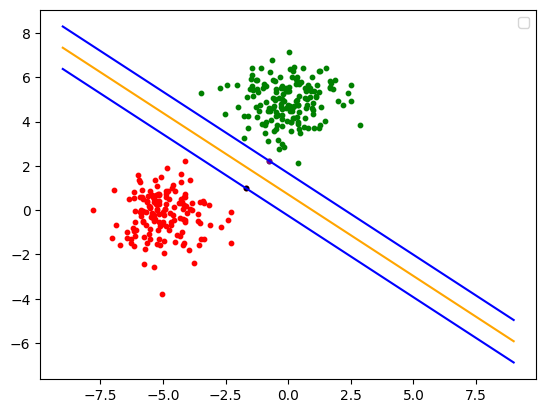

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


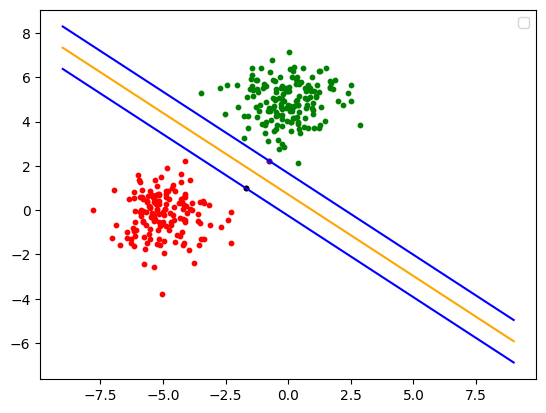

     pcost       dcost       gap    pres   dres
 0: -5.5453e+00 -1.0022e+01  7e+02  2e+01  2e+00
 1: -5.9000e+00 -1.7337e+00  1e+02  3e+00  3e-01
 2: -9.3578e-01 -6.1651e-02  9e+00  3e-01  2e-02
 3: -1.2937e-01 -2.1247e-02  8e-01  3e-02  2e-03
 4: -2.9259e-02 -1.1852e-02  6e-02  2e-03  2e-04
 5: -1.4931e-02 -5.0737e-03  2e-02  7e-04  6e-05
 6: -8.0857e-03 -2.9738e-03  1e-02  3e-04  2e-05
 7: -3.4269e-03 -2.2542e-03  4e-03  8e-05  6e-06
 8: -2.8467e-03 -2.1555e-03  2e-03  5e-05  4e-06
 9: -2.6051e-03 -1.9966e-03  2e-03  4e-05  3e-06
10: -2.3295e-03 -1.7199e-03  2e-03  3e-05  2e-06
11: -2.1403e-03 -1.4769e-03  1e-03  2e-05  1e-06
12: -1.9728e-03 -1.3054e-03  1e-03  1e-05  1e-06
13: -1.4667e-03 -9.9609e-04  5e-04  5e-06  4e-07
14: -9.9333e-04 -9.0333e-04  9e-05  6e-07  5e-08
15: -8.9908e-04 -8.9849e-04  2e-06  8e-09  6e-10
16: -8.9839e-04 -8.9839e-04  2e-08  8e-11  6e-12
Optimal solution found.
Quadratic kernel supporting vector:  [-1.68592465  0.98777046]
Quadratic kernel supporting vect

In [124]:
weight1 = Primal_SVM(dataset_train)
weight2 = Dual_SVM(dataset_train)
primal_accuracy_train = 1 - count_errors(X=dataset_train, w=weight1, flag=1, alphas=None) / 320
primal_accuracy_test = 1 - count_errors(X=dataset_test, w=weight1, flag=1, alphas=None) / 80
print('train_set accuaracy for primal_svm: ', primal_accuracy_train)
print('test_set accuaracy for primal_svm: ', primal_accuracy_test)
dual_accuracy_train = 1 - count_errors(X=dataset_train, w=weight2, flag=1, alphas=None) / 320
dual_accuracy_test = 1 - count_errors(X=dataset_test, w=weight2, flag=1, alphas=None) / 80
print('train_set accuaracy for dual_svm: ', dual_accuracy_train)
print('test_set accuaracy for dual_svm: ', dual_accuracy_test)

draw_classification(dataset_train, weight2)
draw_classification(dataset_train, weight1)
Kernel_SVM(dataset_train,dataset_train,dataset_test,'quadratic')
Kernel_SVM(dataset_train,dataset_train,dataset_test,'gaussian')

## 第三题 更换数据集，重复第二问
更换数据集如下：

In [125]:
#设置随机种子
np.random.seed(50)
#生成200个服从正态分布的随机数
samples = 200                  #样本数
interval_1 = np.array([1,0])  #第一类样本的区间
interval_2 = np.array([0,1])   #第二类样本的区间
cov_matrix = np.array([[1,0],[0,1]]) #协方差矩阵

#生成第一类样本
X_1 = np.random.multivariate_normal(interval_1, cov_matrix, samples)
#生成第二类样本
X_2 = np.random.multivariate_normal(interval_2, cov_matrix, samples)

#将第一类样本的标签设为1
y_1 = np.ones(samples)
#将第二类样本的标签设为-1
y_2 = np.ones(samples) * -1
#将两类样本合并
X = np.vstack((X_1, X_2))
y = np.hstack((y_1, y_2))
X_1 = np.ones(X.shape[0])
X = np.insert(X, 0, values=X_1, axis=1)
dataset = np.column_stack((X, y))
print(dataset)

dataset_train ,dataset_test = train_test_split(dataset,test_size=0.2,random_state=30)


[[ 1.         -0.56035211 -0.0309776   1.        ]
 [ 1.          0.37907158 -1.46458049  1.        ]
 [ 1.          2.41194612 -0.47673214  1.        ]
 ...
 [ 1.         -0.94210244 -0.16022041 -1.        ]
 [ 1.         -1.01157614  1.49898375 -1.        ]
 [ 1.         -1.28940376  1.33778742 -1.        ]]


## 第四问 钓鱼岛归属问题

首先准备相关数据

In [126]:
Dataset = [[1, 121.5, 38.95, 1], [1, 120.9, 40.77, 1], [1, 119.48, 39.83, 1],
           [1, 122.12, 37.5, 1], [1, 126.3, 37.5, 1], [1, 120.4, 36.3, 1],
           [1, 119.2, 34.8, 1], [1, 120.9, 32.0, 1], [1, 121.5, 31.4, 1],
           [1, 121.8, 29.9, 1], [1, 119.3, 26.0, 1], [1, 118.6, 24.9, 1],
           [1, 116.4, 23.3, 1], [1, 110.4, 21.3, 1], [1, 110.3, 20.0, 1],
           [1, 139.7, 35.7, -1], [1, 139.2, 34.7, -1], [1, 136.9, 35.2, -1],
           [1, 138.9, 35.0, -1], [1, 139.8, 35.7, -1], [1, 136.2, 34, -1],
           [1, 139.4, 35.6, -1], [1, 139.7, 35.4, -1]]
sv_dual = []


然后进行相关计算

In [127]:
w = Dual_SVM(Dataset)


     pcost       dcost       gap    pres   dres
 0: -1.3532e+00 -2.0698e+00  5e+01  7e+00  2e+00
 1: -4.6570e-01 -1.1829e-01  5e+00  7e-01  2e-01
 2: -1.2205e-02 -4.7436e-02  1e-01  1e-02  3e-03
 3: -1.1234e-02 -2.5872e-02  1e-02  1e-17  1e-13
 4: -1.6048e-02 -1.8672e-02  3e-03  7e-18  8e-14
 5: -1.8004e-02 -1.8164e-02  2e-04  1e-17  1e-13
 6: -1.8137e-02 -1.8139e-02  2e-06  5e-18  7e-14
 7: -1.8139e-02 -1.8139e-02  2e-08  1e-17  1e-13
Optimal solution found.
Dual_SVM supporting vector:  [126.3, 37.5]
Dual_SVM supporting vector:  [136.2, 34]


可以计算判断得到，钓鱼岛属于+1类。即钓鱼岛属于中国。

多加沿海城市的坐标点基本对结果无影响，因为都不是支撑向量。